In [1]:
import staircase as sc
from imports import *
import operator
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps.read_dataframe(df,'enter','leave')
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
df.shape


(1229, 3)

In [ ]:
print(len(vsteps.steps()))
print(len(vsteps.step_keys()))

<AxesSubplot:xlabel='x'>

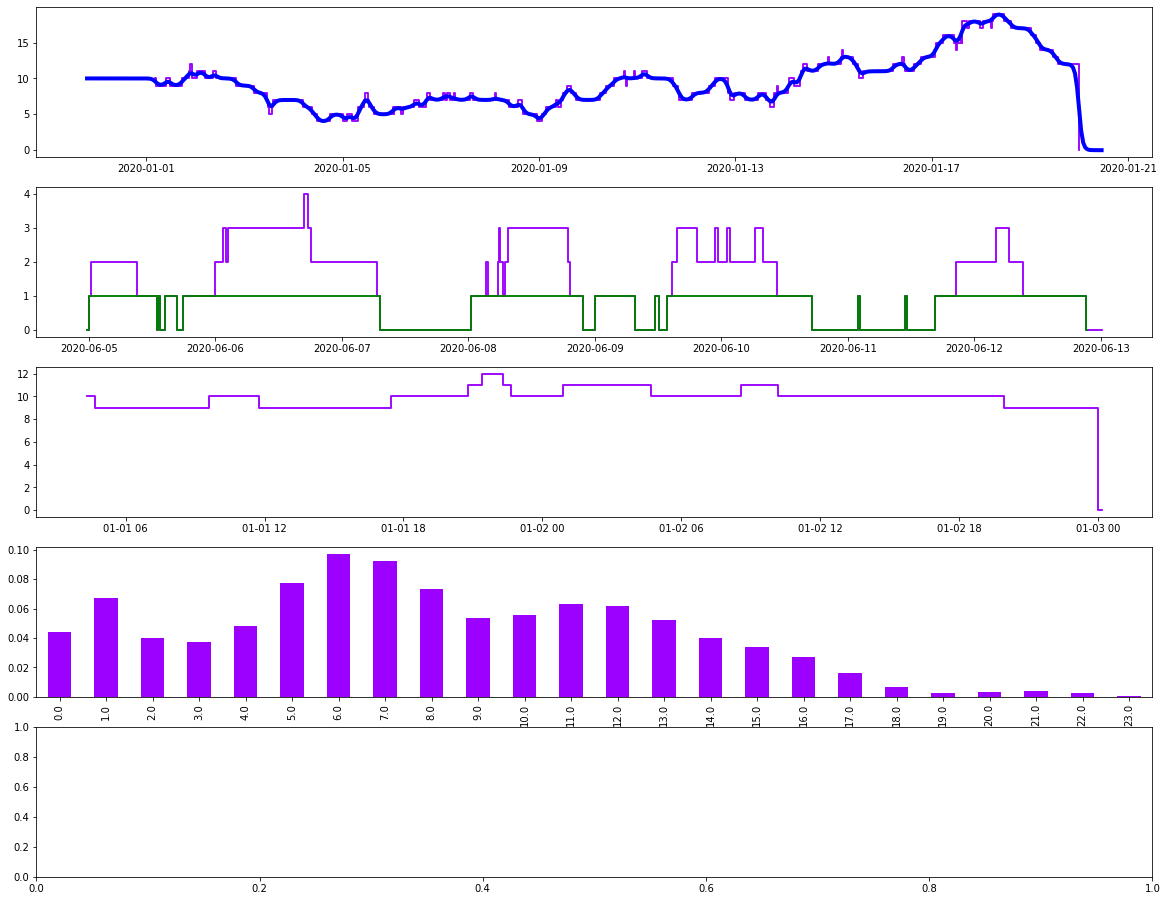

In [3]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=5,figsize=(20,16))

#vsteps.rebase(tbase)
vs_clip4 = vsteps.clip(ubound= pd.Timestamp(2020,1,3))
vs_clip = vsteps.clip(lbound= pd.Timestamp(2020,12,11))

vsteps.clip(ubound=pd.Timestamp(2020,1,20)).plot(ax=ax[0])
#ax[0].step(p,vsteps(p),color='indigo')
((vsteps.clip(ubound=pd.Timestamp(2020,1,20)))<<pd.Timedelta(hours=11)).smooth_plot(ax=ax[0],color='blue',linewidth=4,ts_grain=pd.Timedelta(hours=1))
#((vsteps.clip(ubound=pd.Timestamp(2020,1,20)))).smooth_plot(ax=ax[0],color='blue',linewidth=4,ts_grain=pd.Timedelta(hours=1))

#queue.plot(ax[1])
vc = vsteps.clip(lbound=pd.Timestamp(2020,6,5),ubound=pd.Timestamp(2020,6,13))
vc.plot(ax=ax[1])
vc.normalise().plot(ax=ax[1],color='g')

#vc._operate_norm_new(0,operator.ne).plot(ax=ax[1],color='r')


vs_clip4.plot(ax=ax[2])

vsteps.histogram_plot(ax=ax[3],kind='bar')
#vsteps.ecdf_plot(ax=ax[4],kind='bar',fill=False)
#(vs_clip4 << pd.Timedelta(hours=12)).smooth_plot(ax=ax[2],color='g')
#vs_clip.smooth_plot(ax=ax[2],color='g')
# print(queue.min(),queue.max(),queue.median(),queue.mean())
# print(vsteps.min(),vsteps.max(),vsteps.median(),vsteps.mean())

# print(queue.var(),queue.std(),queue.mode(),queue.integrate())
# print(vsteps.var(),vsteps.std(),vsteps.mode(),vsteps.integrate())

#print(vs_clip(pd.Timestamp(2020,12,10)))
#print(vsteps(pd.Timestamp(2020,12,10)))
#vsteps(pd.Timestamp(2019,1,1))

In [8]:
%%timeit -r 3 -n 3
vsteps.step(p)

825 ms ± 18 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [4]:
%%timeit -r 1 -n 1
queue(p)

47.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
from itertools import groupby

new_steps = []
            
all_keys = [s.start() for s in vc.steps()]
all_values = vc.step(all_keys)

mask = np.where(all_values != 0 , True,False)

groups = [(group[0],group[-1]) for group in (list(group) for key, group in groupby(range(len(mask)), key=mask.__getitem__) if key)]

groups
#for g in groups:

    # s = g[0]
    # e = g[-1]

    # if s == 0 and e == len(self._steps)-1:
    #     return new_instance.add([Step(start=self._start,end=self._end)])

    # if s != e:
    #     new_steps.append(Step(start=self._steps[s].start(), end=self._steps[e].start()))

In [ ]:

all_keys = [s.start() for s in self._steps]
all_values = self.step(all_keys)

mask = np.where(op_func(all_values,other), True,False)

groups = [(group[0],group[-1]) for group in (list(group) for key, group in groupby(range(len(mask)), key=mask.__getitem__) if key)]


In [ ]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,1,7), pd.Timedelta(minutes=1)).astype(pd.Timestamp)

fig,ax = plt.subplots(nrows=3,figsize=(20,16))

fstep = vsteps.step(p)
ax[1].step(p,fstep,where='post')


low_steps = (vsteps ==11)
#ax0 = ax[0].twinx()
low_steps.plot(ax=ax[0],color='r')
low_steps.smooth_plot(ax=ax[0],color='g')

#vsteps.histogram_plot(ax=ax[1],kind='bar')

#queue.hist().plot(ax=ax[1])


In [ ]:

#mbase = np.frompyfunc(mybase2,1,1)
tbase = Basis(Basis.sigmoid,5)


x = Step(3.75)
y = Step(5.6,6)
y2 = Step(8.2,8.8)
y3 = Step(9.2,9.8)

#y3.rebase()
z = Step(7.2)
q = Step(12)

p = Step(9,weight=-1)
p1 = Step(9.5,weight=-1)

ss1 = Steps()
ss1 = ss1.add([z,x,y])

ss2 = Steps()
ss2 = ss2.add([q,x,p])

s1 = sc.Stairs()
s1.layer(4)
s1.layer(5,6)
s1.layer(4)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

#ss3 = ss2 + ss1
ss4 = ss3+y2 + 3

ss5 = Steps().add([y2,y3])

#print(list(ss3._cummulative.values()))
#print(list(ss3._cummulative.keys()))
yy = y3+y3-y2
#ss4.rebase(tbase)
    
p = np.arange(2,13,0.01)

fig,ax = plt.subplots(nrows=6,figsize=(18,14))

ax[0].fill_between(p,ss1.step(p),step='post',alpha=0.3)
ax[1].step(p,ss2.step(p))
ax[2].step(p,ss3.step(p))
s1.plot(ax[2],color='r')
ax[3].step(p,ss4.step(p))
ax[3].fill_between(p,(ss4 > 4).step(p),color='r',step='post',alpha=0.3)
ax[5].step(p,ss5.step(p))
#ax[5].step(p,yy.step(p))



In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.step(p,ss1.step(p),label = "s1")
ax.step(p,ss2.step(p),label = "s2", linestyle="--", linewidth=3)
ax.step(p,ss3.step(p),label = "s3", linestyle="-", linewidth=2)
ax.legend()
